# Robustness curves for binary toy classification problem

In [ ]:
import os
os.chdir("../")
import sys
import json
import numpy as np
from sklearn import metrics
from sklearn.metrics import pairwise_distances as dist
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(context='paper')

import provable_robustness_max_linear_regions.data as dt
from utils import NumpyEncoder
from generate_robustness_curves import generate_curve_data

## Plot settings:

In [2]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('text', usetex=True)

# dictionary that maps color string to 'good looking' seaborn colors that are easily distinguishable
colors = {
    "orange": sns.xkcd_rgb["yellowish orange"],
    "red": sns.xkcd_rgb["pale red"],
    "green": sns.xkcd_rgb["medium green"],
    "blue": sns.xkcd_rgb["denim blue"],
    "yellow": sns.xkcd_rgb["amber"],
    "purple": sns.xkcd_rgb["dusty purple"],
    "cyan": sns.xkcd_rgb["cyan"]
}

## Plot:

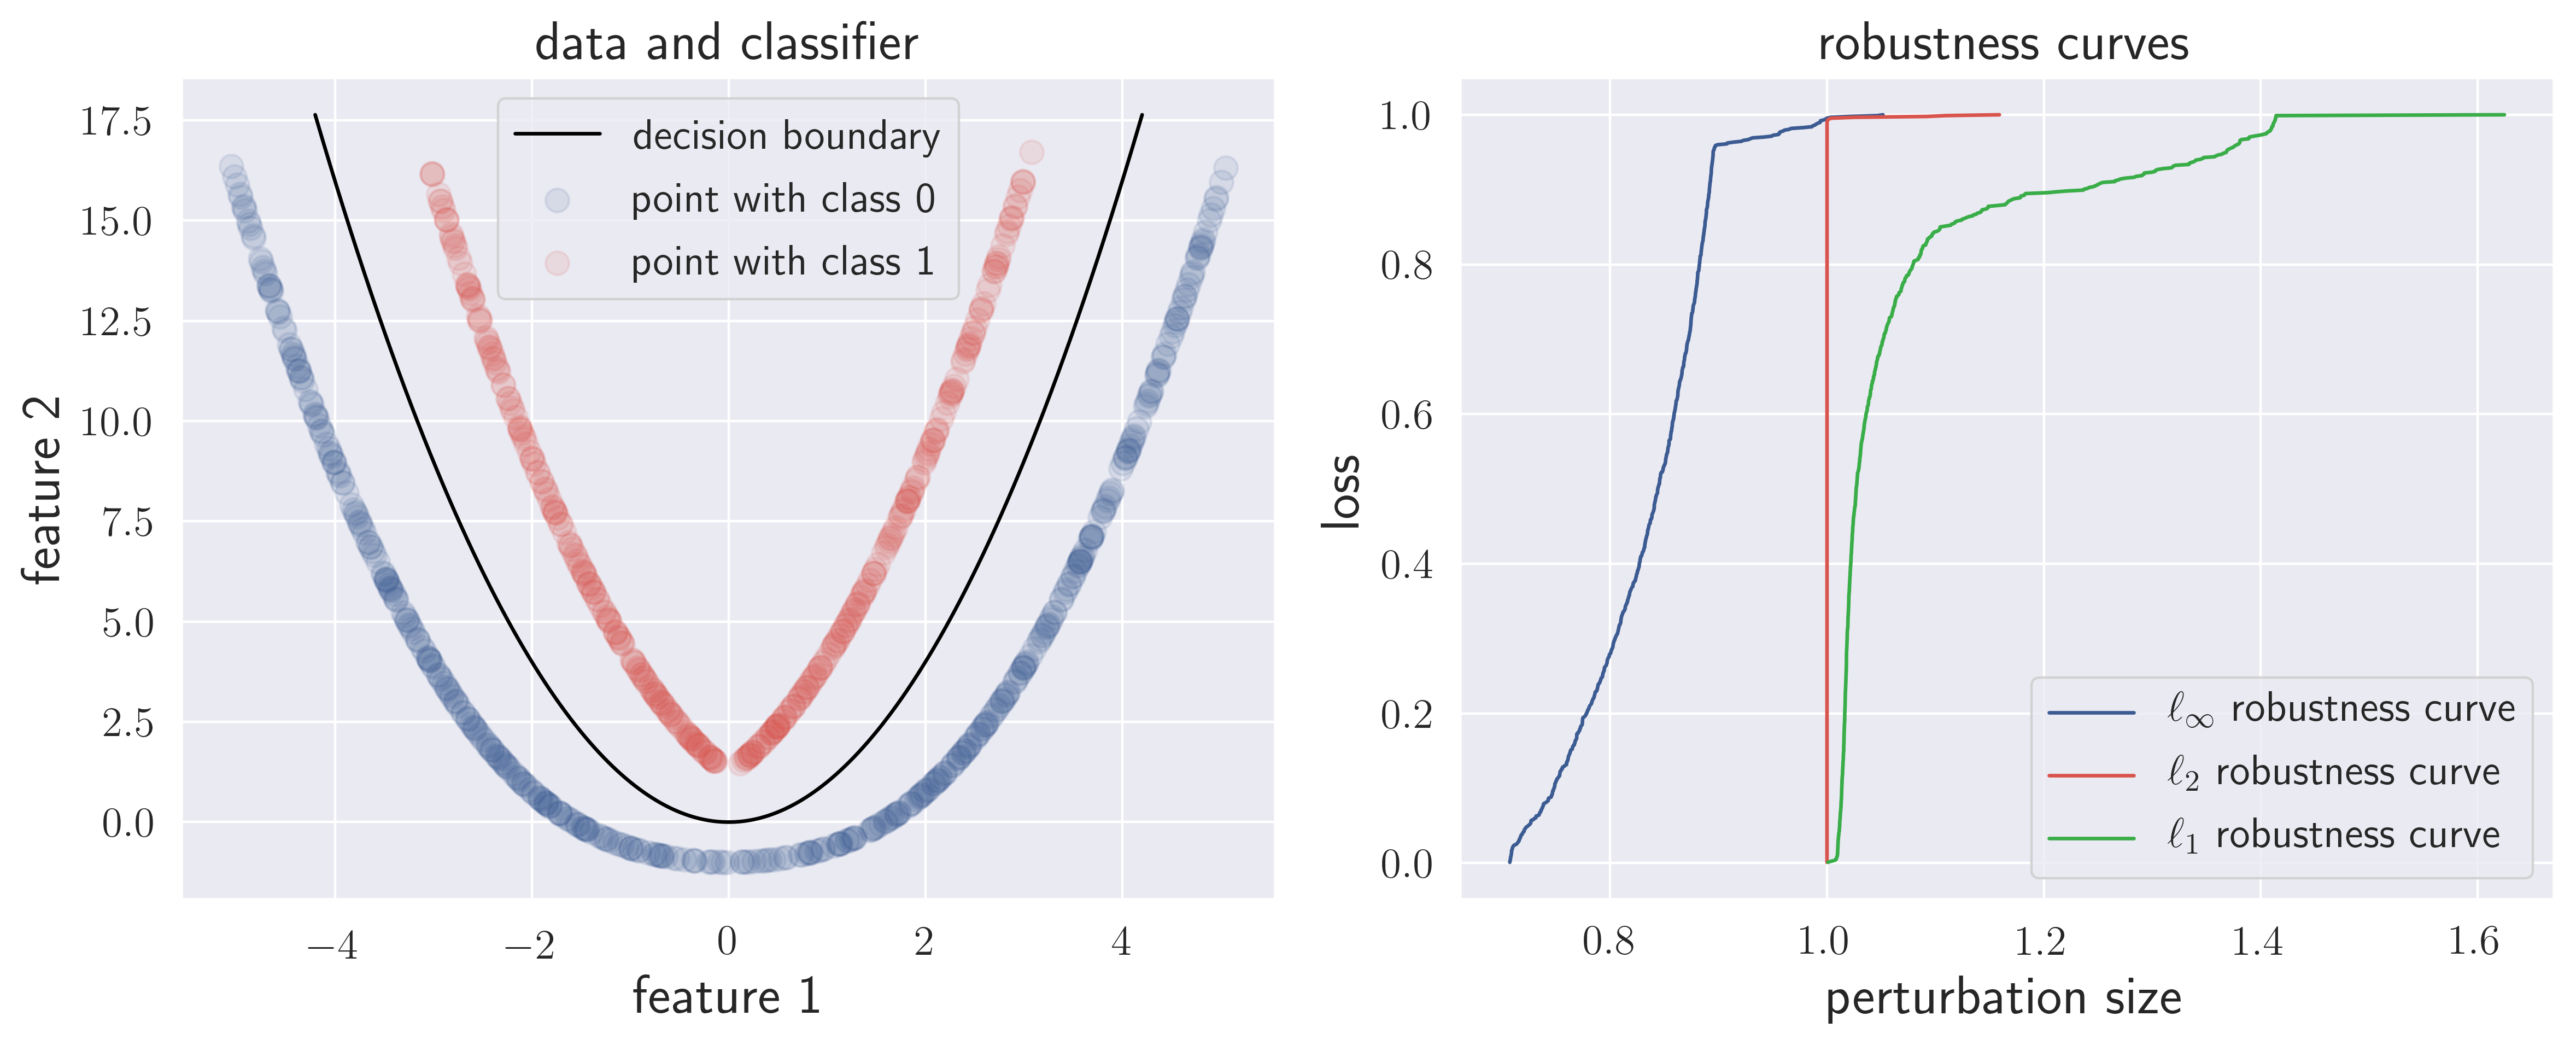

In [3]:
save_name = "fig_rc_synthetic_data"

data = pd.read_csv("res/parabola_data.csv")

n_rows = 1
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize = (6 * n_cols, 5 * n_rows),  dpi=400)

class_0 = data[data["label"] == 0]
class_1 = data[data["label"] == 1]

ax[0].scatter(class_0["x"], class_0["y"], c = colors["blue"], alpha = 0.11, s=60, label = "point with class 0")
ax[0].scatter(class_1["x"], class_1["y"], c = colors["red"], alpha = 0.11, s=60, label = "point with class 1")
ax[0].set_xlabel("feature 1")
ax[0].set_ylabel("feature 2")

def gen_data(lims, foc, n):
    X = np.linspace(-lims, lims, n)
    Y = foc * X**2
    return X,Y

x_lim = 4.2
foc = 1
X,Y = gen_data(x_lim, foc, 3000)

ax[0].plot(X,Y,c='black', label = "decision boundary")
ax[0].set_title("data and classifier")
ax[0].legend()

curves = pd.read_csv("res/parabola_robustness.csv")

ax[1].plot(curves["sup"], curves["probs"], c=colors["blue"], label="$\ell_{\infty}$ robustness curve")
ax[1].plot(curves["l2"], curves["probs"], c=colors["red"], label="$\ell_{2}$ robustness curve")
ax[1].plot(curves["l1"], curves["probs"], c=colors["green"], label="$\ell_{1}$ robustness curve")
ax[1].set_xlabel("perturbation size")
ax[1].set_ylabel("loss")
ax[1].set_title("robustness curves")
ax[1].legend()

fig.tight_layout()
fig.savefig('res/{}.pdf'.format(save_name))